In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Reading all the Csvs

In [39]:
import pandas as pd
import glob
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#loading all the csv files
path = r'/content/drive/MyDrive/CallsSMS Data' # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))
print("total number of files are  " + str(len(all_files)))

total number of files are  116


#Changing csvs to dataframe

In [40]:
#changing csv to dataframe and appending the name of file in dataframe, and adding to list 
ListOfDataframes=[]
user_no=1
for f in all_files:
    df = pd.read_csv(f)
    df['User'] = user_no
    ListOfDataframes.append(df)
    user_no=user_no+1

#Exploring dataframe data

In [41]:
print(ListOfDataframes[0].head(10))

   Number        Date      Time      Type Event  User
0     413  2016-12-20   16:48:1  Incoming  Call     1
1     414  2016-12-20  15:54:34  Outgoing  Call     1
2     414  2016-12-20  15:27:33  Outgoing  Call     1
3     415  2016-12-20  15:17:18  Incoming  Call     1
4     414  2016-12-20  14:57:43  Outgoing  Call     1
5     416  2016-12-20  14:55:23  Outgoing  Call     1
6     416  2016-12-20  14:54:37  Outgoing  Call     1
7     417  2016-12-20   14:54:7  Outgoing  Call     1
8     418  2016-12-20  14:53:50  Outgoing  Call     1
9     415  2016-12-20   14:52:1  Incoming  Call     1


In [42]:
#total dataframes count is 116
print(len(ListOfDataframes))

116


# Exploring and cleaning null values in all dataframes

In [43]:
#This functions returns the columns which are null, and also the dataframes which have null values
df_null_cols = {}
def GetNullColumns(listofDf):
    for df in listofDf: 
        nullCols= df.columns[df.isnull().any()].tolist()
        for col in nullCols:
            if (df['User'][0] not in df_null_cols.keys() or col not in df_null_cols[df['User'][0]]):
                df_null_cols[df['User'][0]]=col
    dc = {n:[k for k in df_null_cols.keys() if df_null_cols[k] == n] for n in set(df_null_cols.values())}

    return dc

In [44]:
null_Col_Df=GetNullColumns(ListOfDataframes)
print(null_Col_Df)

print("Number of dataframes with null values is : " + str(len(sorted({x for v in null_Col_Df.values() for x in v}))))


{'Type': [1, 10, 13, 15, 17, 19, 20, 21, 22, 24, 25, 29, 30, 31, 34, 35, 39, 40, 42, 47, 48, 49, 51, 52, 55, 59, 61, 62, 64, 65, 67, 69, 70, 72, 73, 75, 80, 83, 84, 87, 88, 95, 96, 100, 102, 104, 106, 109, 110, 111, 113, 115], 'Number': [11, 23, 53, 56, 76, 77, 91, 97]}
Number of dataframes with null values is : 60


In [45]:
null_val_dfs=[df for df in ListOfDataframes if  any(df.User.values[0] == item for item in sorted({x for v in null_Col_Df.values() for x in v}))]
print(len(null_val_dfs))
for df in null_val_dfs:
    df.dropna(inplace=True)

60


<Figure size 720x504 with 0 Axes>

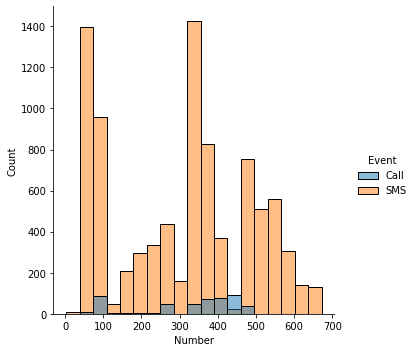

<Figure size 720x504 with 0 Axes>

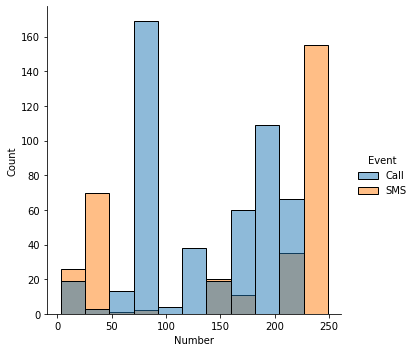

<Figure size 720x504 with 0 Axes>

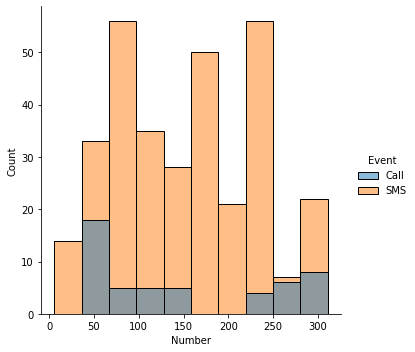

<Figure size 720x504 with 0 Axes>

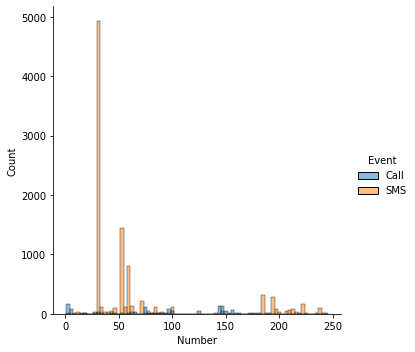

<Figure size 720x504 with 0 Axes>

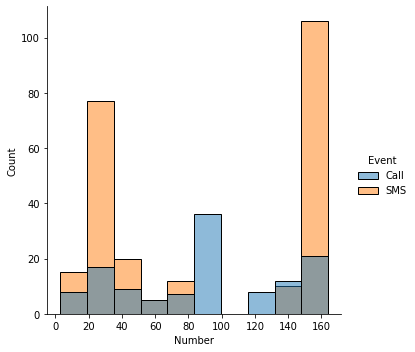

In [46]:
for i in range(0,5):
    plt.figure(figsize=(10, 7))
    sns.displot(ListOfDataframes[i], x="Number" , hue="Event")


# Getting Day from date and chaging time in hrs 

In [47]:
for df in ListOfDataframes:
    df['Date'] = pd.to_datetime(df['Date'])
    df['Days'] = df['Date'].dt.dayofweek
    df.drop(['Date'],axis=1,inplace=True)
    df['Time'] = pd.to_timedelta(df['Time']) 
    df['Time_in_hour'] = [(x.seconds)/(60.0*60.0) for x in df['Time']]
    df.drop(['Time'],axis=1,inplace=True)

ListOfDataframes[0]

,Number,Type,Event,User,Days,Time_in_hour
0,413,Incoming,Call,1,1,16.800278
1,414,Outgoing,Call,1,1,15.909444
2,414,Outgoing,Call,1,1,15.459167
3,415,Incoming,Call,1,1,15.288333
4,414,Outgoing,Call,1,1,14.961944
...,...,...,...,...,...,...
9375,360,Incoming,SMS,1,2,9.722778
9376,672,Incoming,SMS,1,2,0.299167
9377,646,Incoming,SMS,1,2,0.103333
9378,646,Incoming,SMS,1,2,0.100000


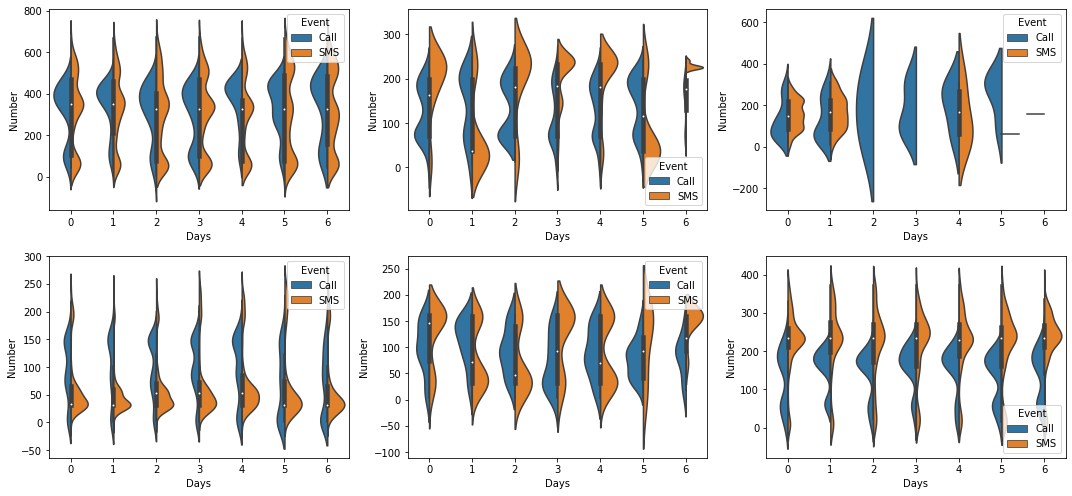

In [48]:
fig = plt.figure(figsize=(15,7))
j=0;
for i in range(0,6):
    j=j+1;
    plt.subplot(2,3,j)
    sns.violinplot(x ='Days', y ='Number', data =  ListOfDataframes[i], hue ='Event', split = True)
plt.tight_layout()
plt.show()

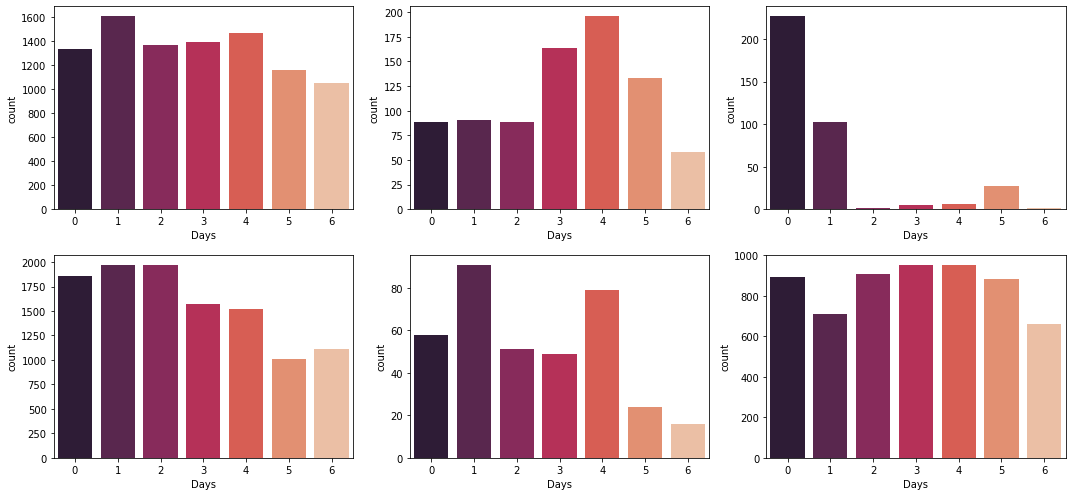

In [49]:
fig = plt.figure(figsize=(15,7))
j=0;
for i in range(0,6):
    j=j+1;
    plt.subplot(2,3,j)
    sns.countplot (x ="Days", data = ListOfDataframes[i], palette = "rocket")
plt.tight_layout()
plt.show()


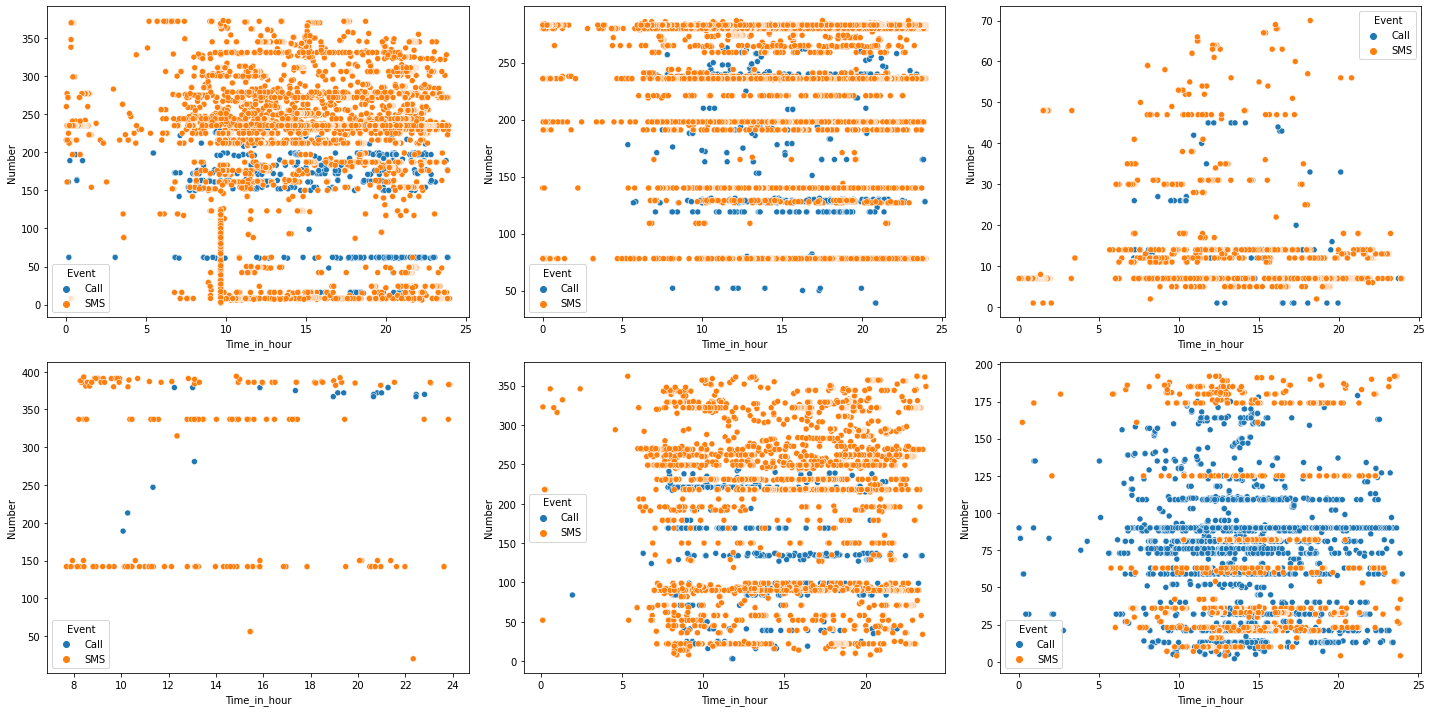

In [52]:
fig = plt.figure(figsize=(20,10))
j=0;
for i in range(5,11):
    j=j+1;
    plt.subplot(2,3,j)
    sns.scatterplot(x="Time_in_hour",y="Number", data=ListOfDataframes[i],hue=ListOfDataframes[i]['Event'])
plt.tight_layout()
plt.show()   

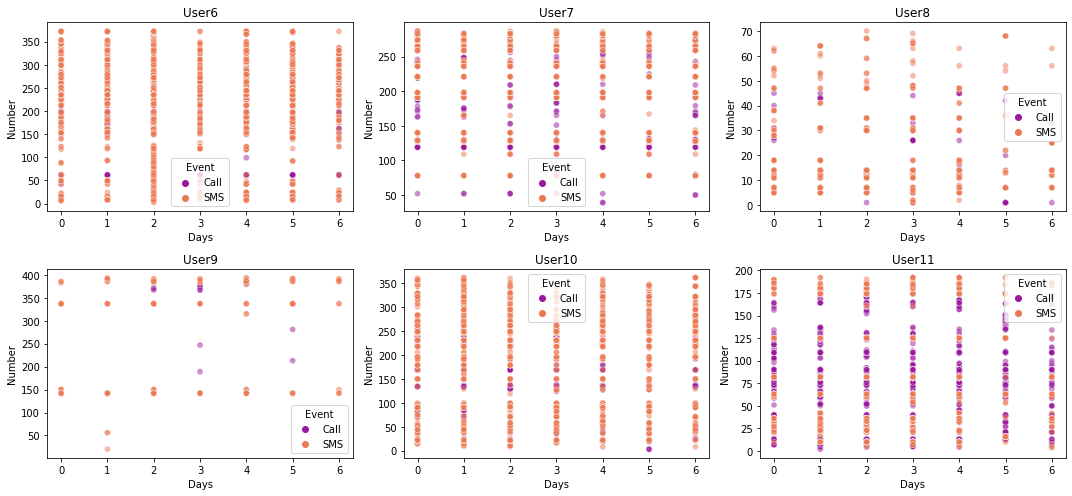

In [54]:
fig = plt.figure(figsize=(15,7))
j=0;
for i in range(5,11):
    j=j+1;
    plt.subplot(2,3,j)
    sns.scatterplot(x ='Days', y ='Number', data = ListOfDataframes[i], palette ='plasma', estimator = np.std ,alpha=0.5, hue=ListOfDataframes[i]['Event']).set(title='User' + str(ListOfDataframes[i].User[0]) )
plt.tight_layout()
plt.show()    

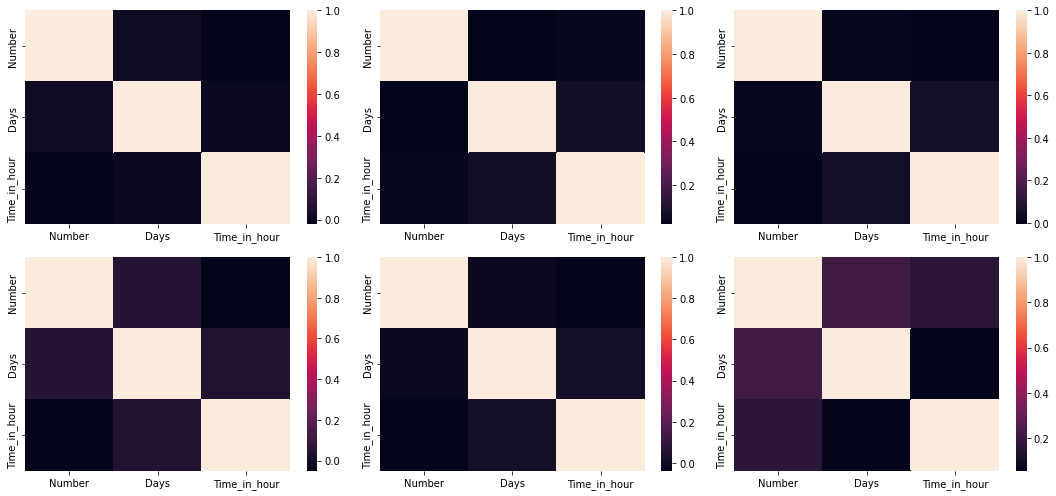

In [55]:
fig = plt.figure(figsize=(15,7))
j=0;
for i in range(10,16):
    j=j+1;
    plt.subplot(2,3,j)
    sns.heatmap(ListOfDataframes[i].drop(['User'],axis=1).corr())
plt.tight_layout()
plt.show()

In [56]:
print(ListOfDataframes[0].Event.unique())
print(ListOfDataframes[0].Type.unique())


['Call' 'SMS']
['Incoming' 'Outgoing' 'Missed']


In [57]:
for df in ListOfDataframes:
    df['Event'].replace(['Call', 'SMS'], [1, 0], inplace=True)
    df['Type'].replace(['Outgoing', 'Missed', 'Incoming'], [1,2,3], inplace=True)

In [58]:
for i in range(len(ListOfDataframes)):
    ListOfDataframes[i]=pd.get_dummies(ListOfDataframes[i],columns=["Event","Type"])
    ListOfDataframes[i].drop(['Event_0'],axis=1,inplace=True)

In [59]:
ListOfDataframes[0]

,Number,User,Days,Time_in_hour,Event_1,Type_1,Type_2,Type_3
0,413,1,1,16.800278,1,0,0,1
1,414,1,1,15.909444,1,1,0,0
2,414,1,1,15.459167,1,1,0,0
3,415,1,1,15.288333,1,0,0,1
4,414,1,1,14.961944,1,1,0,0
...,...,...,...,...,...,...,...,...
9375,360,1,2,9.722778,0,0,0,1
9376,672,1,2,0.299167,0,0,0,1
9377,646,1,2,0.103333,0,0,0,1
9378,646,1,2,0.100000,0,0,0,1


In [60]:
for i in range(len(ListOfDataframes)):
     ListOfDataframes[i]['Event_1'] =  ListOfDataframes[i]['Event_1'].apply(int)
     ListOfDataframes[i]['Days'] =  ListOfDataframes[i]['Days'].apply(int)



In [61]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor
#for i in range(0,1):
predictedList=[]
for i in range(0,9):
  if(len(predictedList)>0):
    lastPred=predictedList[-1];
    ListOfDataframes[0].drop(ListOfDataframes[0][ (ListOfDataframes[0].Number ==lastPred[0][0]) & (ListOfDataframes[0].Event_1==lastPred[0][1])].index,inplace=True)
  X = ListOfDataframes[0].drop(['Number','Event_1'],axis=1)
  y = ListOfDataframes[0][['Number','Event_1']]
  xtrain, xtest, ytrain, ytest=train_test_split(X, y, train_size=0.8, random_state=88)
  clf = MultiOutputClassifier(KNeighborsClassifier(n_neighbors=4)).fit(xtrain, ytrain)
  predicted = clf.predict(xtest.iloc[:1])
  predictedList.append(predicted)
  i=i+1
predictedList

[array([[76,  0]]),
 array([[360,   0]]),
 array([[43,  0]]),
 array([[274,   0]]),
 array([[413,   0]]),
 array([[413,   0]]),
 array([[413,   0]]),
 array([[413,   0]]),
 array([[413,   0]])]